In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv("./data/joined_HPMD.csv")
df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,...,Confidence In National Government,index,Code,Schizophrenia,Bipolar disorders,Eating disorders,Anxiety disorders,Drug use disorders,Depression,Alcohol use disorders
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,...,0.612072,18,AFG,0.164639,0.704480,0.093589,4.860437,2.483862,4.129656,0.659501
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,...,0.611545,19,AFG,0.164932,0.704925,0.095166,4.861533,2.543884,4.129972,0.661185
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,...,0.299357,20,AFG,0.165130,0.705313,0.097327,4.862777,2.571349,4.130874,0.662062
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,...,0.307386,21,AFG,0.165272,0.705688,0.098638,4.864773,2.573170,4.130862,0.662254
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,...,0.435440,22,AFG,0.165424,0.706086,0.099891,4.867283,2.576189,4.132485,0.662372


In [6]:
# drop 2005 data
df =  df[df['Year'] != 2005]
sum_by_year = df.groupby('Year').size()
sum_by_year

Year
2006     71
2007     85
2008     94
2009     86
2010     94
2011    108
2012    105
2013    110
2014    115
2015    117
2016    115
2017    120
dtype: int64

In [7]:

gdp_25 = df['Log GDP Per Capita'].quantile(0.25)
gdp_50 = df['Log GDP Per Capita'].quantile(0.50)
gdp_75 = df['Log GDP Per Capita'].quantile(0.75)

def gdp_level(gdp):
    if gdp > gdp_75:
        return 'high'
    elif gdp_50 < gdp <= gdp_75:
        return 'higher-middle'
    elif gdp_25 < gdp <= gdp_50:
        return 'lower-middle'
    else:
        return 'low'

df['gdp_level'] = df['Log GDP Per Capita'].apply(gdp_level)       
 

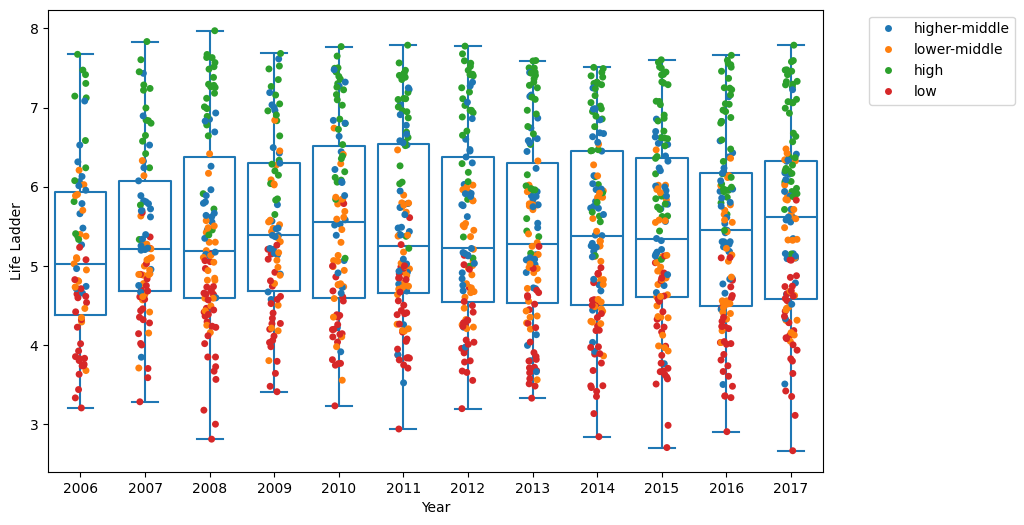

In [8]:
# Life Ladder, 2005~2017
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='Year', y='Life Ladder', fill=False)
sns.stripplot(data=df, x='Year', y='Life Ladder', hue='gdp_level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.show()

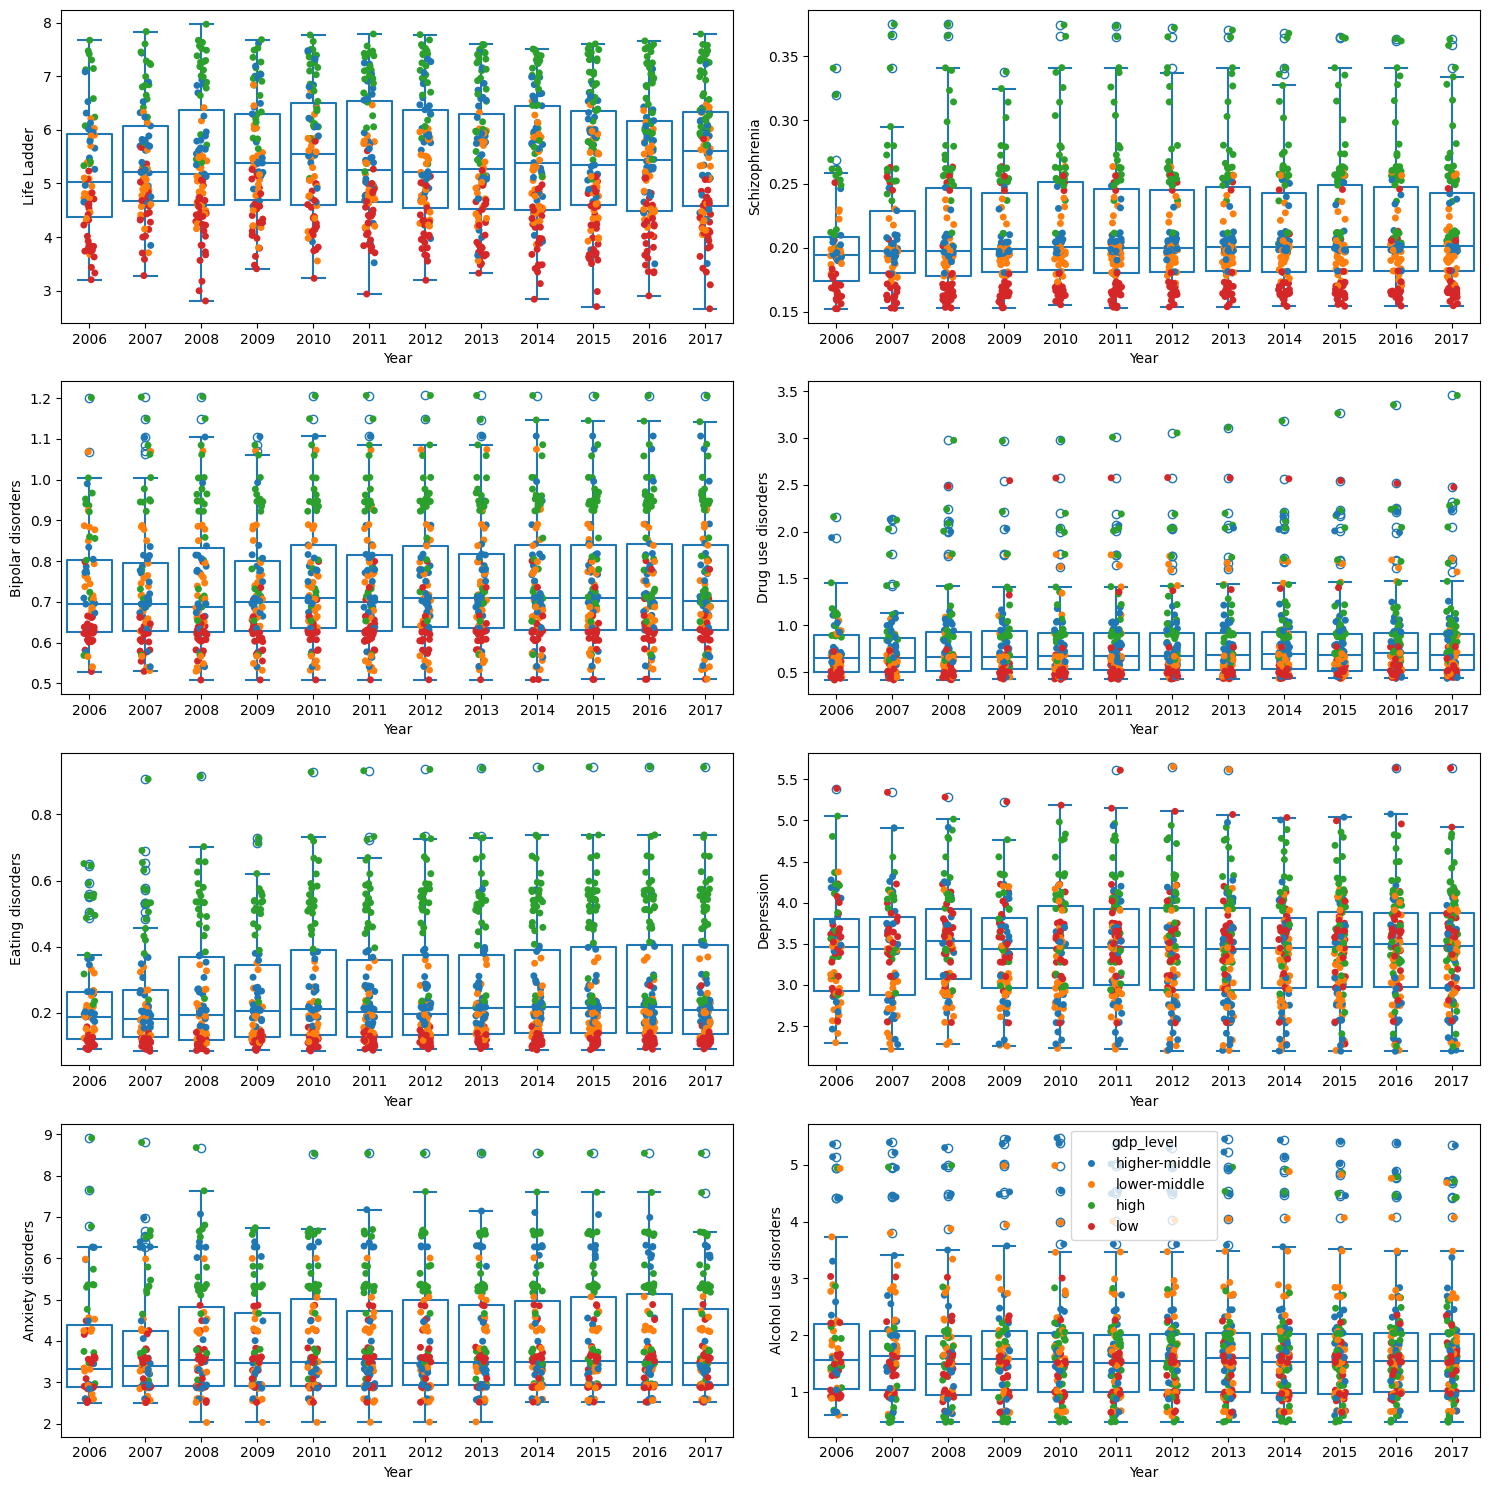

In [9]:
# Life Ladder, 2005~2017
# high gdp

fig, axes = plt.subplots(4, 2, figsize=(15, 15))
sns.boxplot(data=df, x='Year', y='Life Ladder', fill=False, ax = axes[0,0], legend=False)
sns.stripplot(data=df, x='Year', y='Life Ladder', hue='gdp_level', ax = axes[0,0],legend=False)

sns.boxplot(data=df, x='Year', y='Schizophrenia', fill=False, ax = axes[0,1], legend=False)
sns.stripplot(data=df, x='Year', y='Schizophrenia', hue='gdp_level', ax = axes[0,1], legend=False)

sns.boxplot(data=df, x='Year', y='Bipolar disorders', fill=False, ax = axes[1,0], legend=False)
sns.stripplot(data=df, x='Year', y='Bipolar disorders', hue='gdp_level', ax = axes[1,0], legend=False)

sns.boxplot(data=df, x='Year', y='Eating disorders', fill=False, ax = axes[2,0], legend=False)
sns.stripplot(data=df, x='Year', y='Eating disorders', hue='gdp_level', ax = axes[2,0], legend=False)

sns.boxplot(data=df, x='Year', y='Anxiety disorders', fill=False, ax = axes[3,0], legend=False)
sns.stripplot(data=df, x='Year', y='Anxiety disorders', hue='gdp_level', ax = axes[3,0], legend=False)

sns.boxplot(data=df, x='Year', y='Drug use disorders', fill=False, ax = axes[1,1], legend=False)
sns.stripplot(data=df, x='Year', y='Drug use disorders', hue='gdp_level', ax = axes[1,1], legend=False)


sns.boxplot(data=df, x='Year', y='Depression', fill=False, ax = axes[2,1], legend=False)
sns.stripplot(data=df, x='Year', y='Depression', hue='gdp_level', ax = axes[2,1], legend=False)

sns.boxplot(data=df, x='Year', y='Alcohol use disorders', fill=False, ax = axes[3,1], legend=False)
sns.stripplot(data=df, x='Year', y='Alcohol use disorders', hue='gdp_level', ax = axes[3,1])


plt.tight_layout()
plt.show()

In [10]:
# add a column that shows the average of the disorder, from 2006~2017

disorders = [
    "Schizophrenia", "Bipolar disorders", "Eating disorders", 
    "Anxiety disorders", "Drug use disorders", 
    "Depression", "Alcohol use disorders"
]

avg_percentage = df.groupby("Country Name")[disorders].mean()
# df.head()
# print(avg_percentage)

avg_disorder_df = pd.DataFrame(avg_percentage)
avg_disorder_df = avg_disorder_df.reset_index()
# avg_disorder_df.info()

In [11]:
# merge gdp_level with avg_disorder_df

df_aggregated = df.groupby('Country Name', as_index=False).agg({'gdp_level':'first'})
merged_df = pd.merge(avg_disorder_df, df_aggregated, on=['Country Name'], how='left')
avg_disorder_df = merged_df

In [12]:
import plotly.graph_objects as go
import pycountry

def get_country_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

avg_disorder_df['Country Code'] = avg_disorder_df['Country Name'].apply(get_country_code)
avg_disorder_df = avg_disorder_df.dropna(subset=['Country Code'])

fig = go.Figure()

# Add traces for each indicator
for disorder in disorders:
    fig.add_trace(go.Choropleth(
        locations=avg_disorder_df['Country Code'],
        locationmode='ISO-3',
        z=avg_disorder_df[disorder],
        customdata=avg_disorder_df['gdp_level'],
        hovertext=avg_disorder_df['Country Name'],
        hovertemplate='%{hovertext}: %{z:.2f}%<extra></extra> <br>GDP level: %{customdata}',
        name=disorder,
        visible=False,
        colorscale= 'YlGnBu'

    ))

# Set the first indicator trace to be visible by default
fig.data[0].visible = True

# Create dropdown buttons
dropdown_buttons = [
    {
        'label': disorder,
        'method': 'update',
        'args': [
            {'visible': [disorder == ind for ind in disorders]},
            {'title': f"{disorder} Average Percentage (2006~2017)"}
        ]
    }
    for disorder in disorders
]

# Update layout with dropdown
fig.update_layout(
    updatemenus=[dict(
            buttons=dropdown_buttons,
            direction="down",
            showactive=True,
            x=1,
            y=1.15,
            xanchor="right",
            yanchor="top"
        )],
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    title= f'{disorders[0]} Average Percentage (2006~2017)'
)

fig.show()


In [13]:
fig.write_html("./assets/avg_disorder_map.html")